# Exploratory Analysis

In [2]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

## Get the data

In [3]:
from olistClass.data import Olist
data = Olist().get_data()

## Investigate the cardinalities of DataFrames

In [4]:
 # unique `orders`, `reviews`, `sellers`, `products` and `customers` are there ?**
aggregates = np.array([
    [
        data["orders"].order_id.nunique(),
        data["order_reviews"].review_id.nunique(),
        data["sellers"].seller_id.nunique(),
        data["products"].product_id.nunique(),
        data["customers"].customer_id.nunique(),
    ],
    [
        data["orders"].order_id.count(),
        data["order_reviews"].review_id.count(),
        data["sellers"].seller_id.count(),
        data["products"].product_id.count(),
        data["customers"].customer_id.count(),
    ],
])

pd.DataFrame(data=np.vstack((aggregates, aggregates[0,:]/aggregates[1,:])).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
            columns=['nunique', 'count','ratio'])

,nunique,count,ratio
orders,99441.0,99441.0,1.000000
reviews,98410.0,99224.0,0.991796
sellers,3095.0,3095.0,1.000000
products,32951.0,32951.0,1.000000
customers,99441.0,99441.0,1.000000


In [5]:
# reviews per order. Check if we have review for all orders
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]

In [6]:
orders_reviews = orders.merge(reviews, on='order_id', how='outer')
orders_reviews.head(2)

,customer_id,order_id,review_id
0,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,97ca439bc427b48bc1cd7177abe71365
1,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,7b07bacd811c4117b742569b04ce3580


In [ ]:
# missing reviews
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

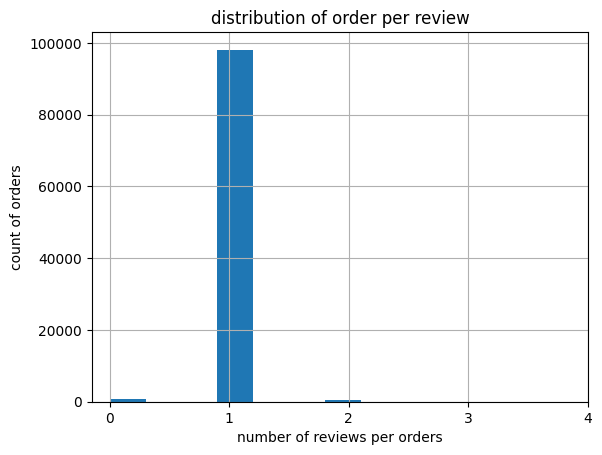

In [ ]:
# Plot the distribution of order per review
%matplotlib inline
import matplotlib.pyplot as plt
# Check for max number of reviews per order
ordersDf = data['orders']
reviewsDf = data['order_reviews']
# merge order and review table
order_review_merge=ordersDf.merge(reviewsDf,how='left',on='order_id')
# group the reviews by order id
per_order=order_review_merge.groupby("order_id")["review_id"].count()
# plot the histgram
per_order.hist(bins=10)
plt.xlabel("number of reviews per orders")
plt.ylabel("count of orders")
plt.title("distribution of order per review")
plt.xticks(range(0, per_order.max()+2))
plt.show()

In [9]:
# calcukate missing review
# missing reviews means no review id
n_missing_reviews= order_review_merge[order_review_merge["review_id"].isna()]["order_id"].nunique()
n_missing_reviews

768